<a href="https://colab.research.google.com/github/appleBattery/Eye-based-Verification/blob/master/Save_iitd_database_to_h5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Save IITD dataset to hdf5 file:

### Import dependencies

In [ ]:
from matplotlib import pyplot
import numpy as np
import sys

In [ ]:
folder = '/Users/sudiptaborah/Desktop/Iris recognition project/databases/IITD Database/014'
img = pyplot.imread(folder + '/01_L.bmp')

In [ ]:
img.shape

(240, 320, 3)

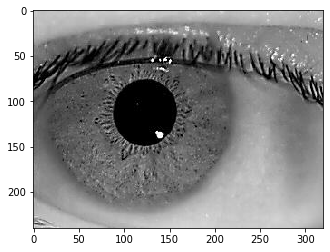

In [ ]:
pyplot.imshow(img)

### Load images to an array from disk

In [ ]:
iitd_L = np.zeros((1040,240,320,3),np.uint8) #208 subjects with 5 left and 5 right images
iitd_R = np.zeros((1040,240,320,3),np.uint8)

In [ ]:
folder = '/Users/sudiptaborah/Desktop/Iris recognition project/databases/IITD Database/0'
count = 0
for i in range(14,100):
    if (i==27)|(i==55)|(i==65): # skip these folders
        continue
    for j in range(1,6):
        iitd_L[count,:] = np.array(pyplot.imread(folder + str(i) + '/0' + str(j) + '_L.bmp'),int)
        count += 1

folder = '/Users/sudiptaborah/Desktop/Iris recognition project/databases/IITD Database/'
for i in range(100,225):
    for j in range(1,6):
        iitd_L[count,:] = np.array(pyplot.imread(folder + str(i) + '/0' + str(j) + '_L.bmp'),int)
        count += 1

In [ ]:
dat = iitd_L[414,:]
pyplot.imshow(dat.astype(int))

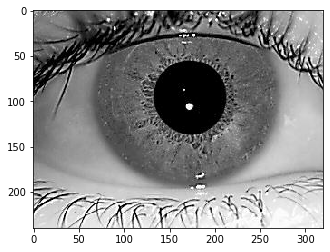

In [ ]:
dat = iitd_L[1039,:]
pyplot.imshow(dat.astype(int))

In [ ]:
# the same for the right eye
folder = '/Users/sudiptaborah/Desktop/Iris recognition project/databases/IITD Database/0'
count = 0
for i in range(14,100):
    if (i==27)|(i==55)|(i==65):
        continue
    for j in range(6,11):
        if j==10:
            iitd_R[count,:] = np.array(pyplot.imread(folder + str(i) + '/' + str(j) + '_R.bmp'),int)
            count += 1
        else:
            iitd_R[count,:] = np.array(pyplot.imread(folder + str(i) + '/0' + str(j) + '_R.bmp'),int)
            count += 1

folder = '/Users/sudiptaborah/Desktop/Iris recognition project/databases/IITD Database/'
for i in range(100,225):
    for j in range(6,11):
        if j==10:
            iitd_R[count,:] = np.array(pyplot.imread(folder + str(i) + '/' + str(j) + '_R.bmp'),int)
            count += 1
        else:
            iitd_R[count,:] = np.array(pyplot.imread(folder + str(i) + '/0' + str(j) + '_R.bmp'),int)
            count += 1

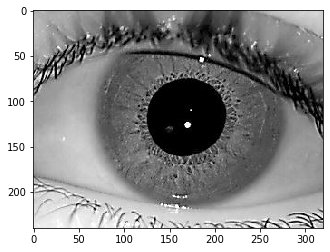

In [ ]:
pyplot.imshow(iitd_R[1039,:].astype(int))

### Store array to an h5 file

In [ ]:
import h5py

In [ ]:
archive = '/Users/sudiptaborah/Desktop/Iris recognition project/databases/iitd.h5'
with h5py.File(archive,'w') as f:
    # create a dataset for your movie
    dataL = f.create_dataset('L', data=iitd_L,chunks = True, compression = 'gzip')
    dataR = f.create_dataset('R', data=iitd_R,chunks = True, compression = 'gzip')

In [ ]:
sys.getsizeof(iitd_L)

239616144

In [ ]:
with h5py.File(archive,'r') as f:
    temp = np.array(f['R'])